### Figure 1
This notebook can be used to reproduce Figure 1, showing how the averaged operator entanglement entropy and scrambling time behave for three different system sizes.

In [1]:
from bisect import bisect_right
import os
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data
We only require the data for three different system sizes. Below, we load the required sets of data.
These contain the results of caculating the entropy for systems with $N = 400, 1200, 2000$, averaged over 60 realisations of the circuit to smooth over fluctuations. For these results the fraction of the chain on which we compute the entropy is $m = 1/4$.

In [2]:
data_dir = "data/entropy_data"
selected_sizes = [400, 1200, 2000]
dirlist = os.listdir(data_dir)
entropies = {}
for file in dirlist:
    if file.endswith(".npz") and file.startswith("N"):
        data = np.load(os.path.join(data_dir, file))
        N = int(file.split("_")[0][1:])
        if N in selected_sizes:
            for arr in data:
                entropies[N] = data[arr]

#### Reproducing the plots

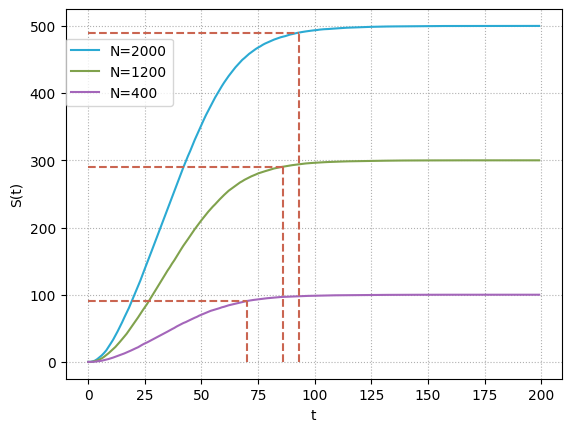

In [3]:
eps = 10
cutoffs = [N / 4 - eps for N in selected_sizes]
tscr = [
    bisect_right(entropies[selected_sizes[i]], cutoffs[i]) for i in range(3)
]

colors = ["#2baad3", "#80a24d", "#a466ba"]
plt.figure()
for i, N in enumerate(reversed(selected_sizes)):
    plt.plot(entropies[N], label=f"N={N}", color=colors[i])
plt.vlines(
    tscr[0], ymin=0, ymax=cutoffs[0], color="#ca6551", linestyle="dashed"
)
plt.hlines(
    cutoffs[0], xmin=0, xmax=tscr[0], color="#ca6551", linestyle="dashed"
)
plt.vlines(
    tscr[1], ymin=0, ymax=cutoffs[1], color="#ca6551", linestyle="dashed"
)
plt.hlines(
    cutoffs[1], xmin=0, xmax=tscr[1], color="#ca6551", linestyle="dashed"
)
plt.vlines(
    tscr[2], ymin=0, ymax=cutoffs[2], color="#ca6551", linestyle="dashed"
)
plt.hlines(
    cutoffs[2], xmin=0, xmax=tscr[2], color="#ca6551", linestyle="dashed"
)
plt.grid(linestyle="dotted")
plt.xlabel("t")
plt.ylabel("S(t)")
plt.legend(bbox_to_anchor=(0, 0.92), loc="upper left", borderaxespad=0.0)
plt.show()